In [1]:

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import nibabel as nib
import json

import torch
import torch.nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim
from copy import deepcopy

from unet import *

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
def calculate_snr(image_num, signal_roi, noise_roi):
    
    signal_sum = 0
    noise_sum = 0
    sum = 0

    for i in range(32):
        image = image_num[:, :, i]

        for j in range(3):
            signal = image[signal_roi[j][0]:signal_roi[j][0]+20, signal_roi[j][1]:signal_roi[j][1]+20]
            noise = image[noise_roi[j][0]:noise_roi[j][0]+20, noise_roi[j][1]:noise_roi[j][1]+20]

            signal = np.mean(signal)
            noise = np.std(noise)

            signal_sum += signal
            noise_sum += noise
       
        mean = signal_sum / 3
        std = noise_sum / 3

        # SNR 계산
        snr = mean / std

        sum += snr

    avg_snr = sum / 32

    return avg_snr

In [7]:
PATH = "C:/Users/user/dicom/model/model_5/output"

# model.load_state_dict(torch.load("C:/Users/user/dicom/model/model_4/weights_log/model_0071.pth")) 

image_list = os.listdir(PATH)

In [8]:
noise_roi = [[10, 10], [10, 325], [350, 340]]
signal_roi = [[260, 210], [125, 195], [160, 280]]

In [104]:
IMAGE_NUM = image_list[13]  # 0~34

image_path = os.path.join(PATH, IMAGE_NUM)
nifti = nib.load(image_path)
image = nifti.get_fdata()

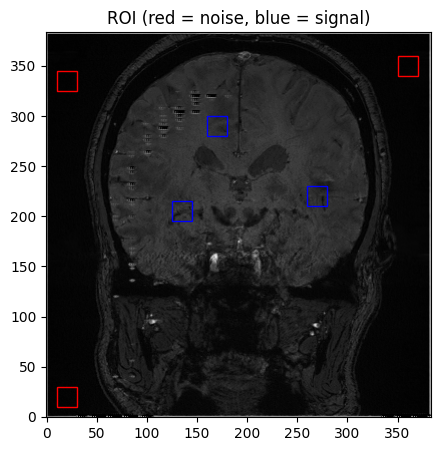

In [105]:
plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.imshow(image[:, :, 16].T, cmap='gray', origin = 'lower')
plt.title('ROI (red = noise, blue = signal)')

shp1=patches.Rectangle((signal_roi[0][0], signal_roi[0][1]), 20, 20, color='b', fill = False)
plt.gca().add_patch(shp1)
shp2=patches.Rectangle((signal_roi[1][0], signal_roi[1][1]), 20, 20, color='b', fill = False)
plt.gca().add_patch(shp2)
shp3=patches.Rectangle((signal_roi[2][0], signal_roi[2][1]), 20, 20, color='b', fill = False)
plt.gca().add_patch(shp3)

shp4=patches.Rectangle((noise_roi[0][0], noise_roi[0][1]), 20, 20, color='r', fill = False)
plt.gca().add_patch(shp4)
shp5=patches.Rectangle((noise_roi[1][0], noise_roi[1][1]), 20, 20, color='r', fill = False)
plt.gca().add_patch(shp5)
shp6=patches.Rectangle((noise_roi[2][0], noise_roi[2][1]), 20, 20, color='r', fill = False)
plt.gca().add_patch(shp6)

In [68]:
snr = calculate_snr(image, signal_roi, noise_roi)
print(f"snr: {snr}")

snr: 66.25570542481236


In [9]:
snr_list = []

for i in range(len(image_list)):
    IMAGE_NUM = image_list[i]  # 0~34

    image_path = os.path.join(PATH, IMAGE_NUM)
    nifti = nib.load(image_path)
    image = nifti.get_fdata()

    snr = calculate_snr(image, signal_roi, noise_roi)
    print(f"snr {i}: {snr}")
    snr_list.append(snr)

snr 0: 74.41883360650652
snr 1: 76.6156102053929
snr 2: 57.10883962444161
snr 3: 60.84786419586059
snr 4: 131.53959957717575
snr 5: 81.75429612481514
snr 6: 69.41456885137283
snr 7: 162.52525061195578
snr 8: 43.40371233385521
snr 9: 109.91402699387767
snr 10: 120.43153530679876
snr 11: 76.09784937478504
snr 12: 98.45396184658274
snr 13: 60.92626831836361
snr 14: 78.59634245318398
snr 15: 117.47098349577674
snr 16: 34.922678739087324
snr 17: 70.05405737253571
snr 18: 59.96198208342143
snr 19: 54.95639884018958
snr 20: 108.14010863886831
snr 21: 99.49852850091517


ImageFileError: Cannot work out file type of "C:/Users/user/dicom/model/model_5/output/새 폴더"

In [10]:
print(np.min(snr_list), np.max(snr_list), np.mean(snr_list), np.std(snr_list))

34.922678739087324 162.52525061195578 83.95696804980739 30.523422584835853
